In [1]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots

In [2]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

### Rejection sampling

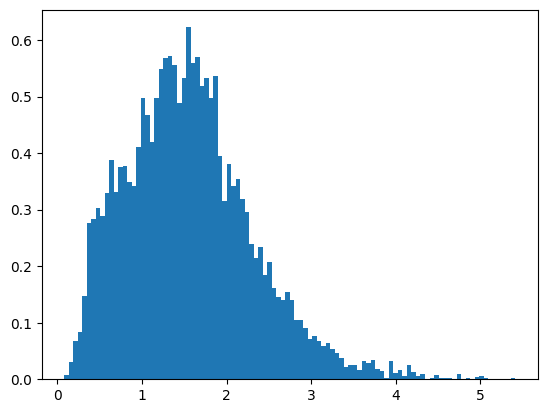

In [11]:
# Normalize the hist to have a pdf
nbin = 100
plt.hist(z, nbin, density=True, label='original data')
plt.show()

In [4]:
y, x = np.histogram(z, bins=nbin, density=True)
# x = bin extremes
# y = counts per bin

In [5]:
xmin = np.min(x)
xmax = np.max(x)
ymax = np.max(y)

In [6]:
Nt = 10000

xt = np.random.uniform(xmin,xmax,Nt)   # Expand the range on the x (I'm cloning --> on a wider range)
yt = np.random.uniform(0,ymax,Nt)

xnew = np.array([])
ynew = np.array([])
xplot = np.array([])

#for i in range(nbin):
#    xplot = np.append(xplot, (x[i+1] + x[i])/2)



In [7]:
for t in range(Nt):
    for i in range(nbin):
        if xt[t] >= x[i] and xt[t] < x[i+1]:
            if yt[t] <= y[i]:
                xnew = np.append(xnew, xt[t])
                ynew = np.append(ynew, yt[t])

print(xnew);
print(np.size(xnew))
print(ynew);
print(np.size(ynew))

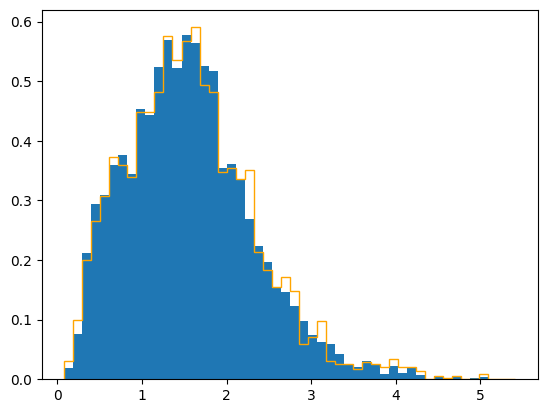

In [8]:
plt.hist(z, nbin, density=True)
# plt.scatter(xnew,ynew,s=10)
plt.hist(xnew, bins=x, density=True, color='orange',  histtype='step') # stesso binning dei dati iniziali, altrimenti sballa
#plt.plot(xplot,y)
plt.show()

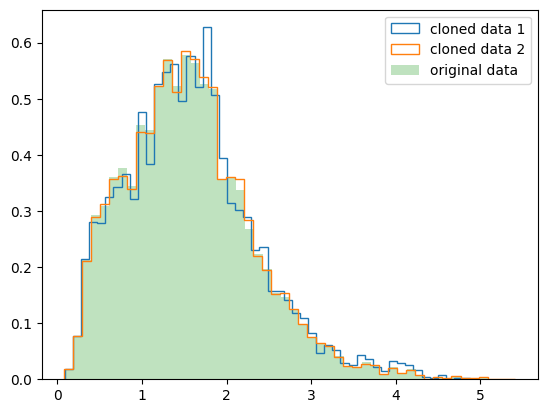

In [9]:
# Alternativa prof
counts, bins = np.histogram(z, bins=nbin, density=True)
# x = bin extremes
# y = counts per 

maxh = counts.max() # find the maximum

# Let's do it manually again
N = 100000 # trials
q = np.random.uniform(-10, 30, N) # proposed points
u = np.random.uniform(0, maxh, N) # uniform draws

# !!!
disth = scipy.stats.rv_histogram((counts,bins)) # crea func a gradino che segue l'istogramma 
mask = u<=disth.pdf(q) # assess whether u <= q(x_i
monte_carlo = q[mask] # reject all points that don't pass, using masking

plt.hist(monte_carlo, bins=50, density=True,histtype='step',label='cloned data 1');

### But scipy has it already implemented 
plt.hist(disth.rvs(size=N),bins=50,density=True,histtype='step',label='cloned data 2');

plt.hist(z,bins=50,density=True,label='original data', alpha=0.3);

plt.legend();



### Inverse transform sampling

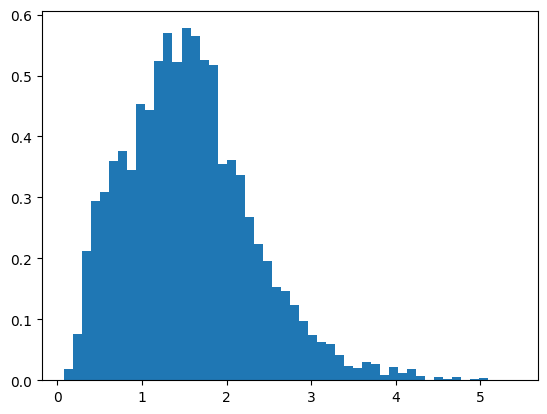

In [10]:
# Guardo correzione!!!

from scipy import stats, interpolate

Ndata = 1000

# create a cumulative distribution
z.sort()
Pz_cuml = np.linspace(0, 1, np.size(z))

# set up an interpolation of the inverse cumulative distribution
tck = interpolate.splrep(Pz_cuml, z)

# sample evenly along the cumulative distribution, and interpolate
Pz_cuml_sample = np.linspace(0, 1, 10 * Ndata)
z_sample = interpolate.splev(Pz_cuml_sample, tck)

plt.hist(z_sample, nbin, density=True)
plt.show()